In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
#glob.glob('*.xlsx')

In [3]:
country = pd.read_excel('RW - Credit Risk Counterparties as of 30.04.2014 CapRes.xlsx', sheet_name='countries')
country['Country'][0] = ''

In [4]:
country.columns = ['Country', "Moody's_(long_term)", "S&P_(long_term)", "Fitch_(long_term)", 
                   "Moody's_outlook","S&P_outlook", "Fitch_outlook"]

In [5]:
country.drop(24,axis = 0, inplace=True)
country.drop(10,axis = 0, inplace=True)
country.drop(22,axis = 0, inplace=True)

In [6]:
country.head(3)

,Country,Moody's_(long_term),S&P_(long_term),Fitch_(long_term),Moody's_outlook,S&P_outlook,Fitch_outlook
0,,Long Term,Long Term,Long Term,Outlook,Outlook,Outlook
1,Estonia,A1,AA-,A+,STABLE,STABLE,STABLE
2,Austria,Aaa,AA+,AAA,STABLE,STABLE,STABLE


In [7]:
country.drop(0, axis = 0, inplace=True)

In [8]:
country["Moody\'s_(long_term)"].unique()

array(['A1', 'Aaa', 'Baa2', 'Ba1', 'Baa1', 'A2', 'Ba3', 'Baa3'],
      dtype=object)

In [9]:
grades = []

# For each row in the column,
for row in country["Moody\'s_(long_term)"]:
    # if more than a value,
    if row == 'Aaa':
        # Append a letter grade
        grades.append(1)
    # else, if more than a value,
    elif row == 'A1':
        # Append a letter grade
        grades.append(2)
    # else, if more than a value,
    elif row == 'A2' :
        # Append a letter grade
        grades.append(3)
    # else, if more than a value,
    elif row == 'Baa1' :
        # Append a letter grade
        grades.append(4)
    # else, if more than a value,
    elif row == 'Baa2':
        # Append a letter grade
        grades.append(5)
    # else, if more than a value,
    elif row == 'Ba1':
        # Append a letter grade
        grades.append(6)
    # else, if more than a value,
    elif row == 'Baa3':
        # Append a letter grade
        grades.append(7)
    # else, if more than a value,
    elif row == 'Ba3':
        # Append a letter grade
        grades.append(8)
    # otherwise,
    else:
        # Append a failing grade
        grades.append(0)

# Create a column from the list
country['Rating'] = grades

In [10]:
country['Rating'] = country['Rating'].astype('int')

In [11]:
country.head(3)

,Country,Moody's_(long_term),S&P_(long_term),Fitch_(long_term),Moody's_outlook,S&P_outlook,Fitch_outlook,Rating
1,Estonia,A1,AA-,A+,STABLE,STABLE,STABLE,2
2,Austria,Aaa,AA+,AAA,STABLE,STABLE,STABLE,1
3,Bulgaria,Baa2,BBB,BBB-,STABLE,NEG,STABLE,5


In [12]:
country[country['Rating']== 1]

,Country,Moody's_(long_term),S&P_(long_term),Fitch_(long_term),Moody's_outlook,S&P_outlook,Fitch_outlook,Rating
2,Austria,Aaa,AA+,AAA,STABLE,STABLE,STABLE,1
5,Germany,Aaa,AAAu,AAA,STABLE,STABLE,STABLE,1
16,Sweden,Aaa,AAAu,AAA,STABLE,STABLE,STABLE,1
18,Switzerland,Aaa,AAAu,AAA,STABLE,STABLE,STABLE,1
20,UK,Aaa,AAAu,AA+,STABLE,NEG,STABLE,1
21,Netherlands,Aaa,AA+u,AAA,STABLE,STABLE,STABLE,1
23,United States Of America (3352Z US),Aaa,AA+u,AAA,STABLE,STABLE,STABLE,1


In [13]:
country[country['Rating']== 8]

,Country,Moody's_(long_term),S&P_(long_term),Fitch_(long_term),Moody's_outlook,S&P_outlook,Fitch_outlook,Rating
12,Portugal,Ba3,BBu,BB+,STABLE,NEG,NEG,8
17,Georgia,Ba3,BB-,BB-,STABLE,STABLE,STABLE,8


In [14]:
country = country.set_index('Country')
country['Moody\'s_(long_term)'].unique()

array(['A1', 'Aaa', 'Baa2', 'Ba1', 'Baa1', 'A2', 'Ba3', 'Baa3'],
      dtype=object)

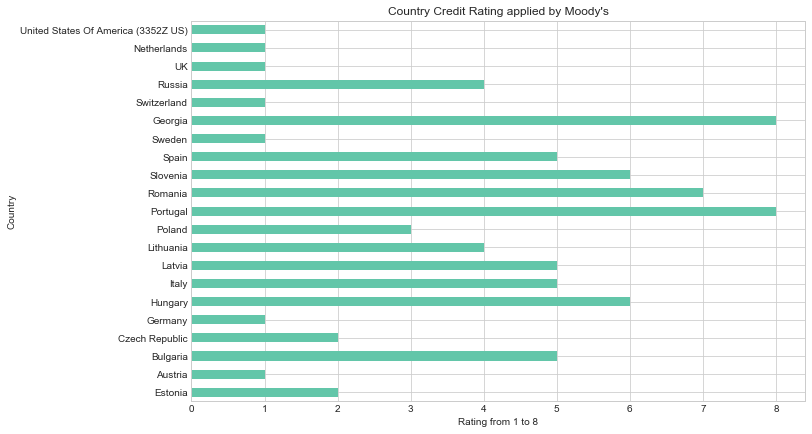

In [15]:
plt.figure(figsize = (7,5))
country.Rating.plot(kind = 'barh', figsize = (11,7),color = '#63c6a9')
plt.title("Country Credit Rating applied by Moody's")
plt.xlabel('Rating from 1 to 8')
plt.show()

In [16]:
import plotly.plotly as py
import cufflinks as cf

In [18]:
country.iplot(kind='bar')  #.std, .mean, .sum, .cumsum can be used